In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

In [3]:
dim_airport = pd.read_csv('../output/Dim_Airport.csv')
dim_marketing_airline = pd.read_csv('../output/Dim_Marketing_Airline.csv')
dim_operating_airline = pd.read_csv('../output/Dim_Operating_Airline.csv')
dim_date = pd.read_csv('../output/Dim_Date.csv')
dim_time = pd.read_csv('../output/Dim_Time.csv')
fact_flight = pd.read_csv('../output/FactFlight.csv')

print(f"Dim_Airport: {len(dim_airport)} записів")
print(f"Dim_Marketing_Airline: {len(dim_marketing_airline)} записів")
print(f"Dim_Operating_Airline: {len(dim_operating_airline)} записів")
print(f"Dim_Date: {len(dim_date)} записів")
print(f"Dim_Time: {len(dim_time)} записів")
print(f"FactFlight: {len(fact_flight):,} записів")


Dim_Airport: 389 записів
Dim_Marketing_Airline: 11 записів
Dim_Operating_Airline: 28 записів
Dim_Date: 1673 записів
Dim_Time: 1305 записів
FactFlight: 29,204,363 записів


Загальна кількість рейсів за роками:
 year  flights_count
 2018        5691507
 2019        8094426
 2020        5024638
 2021        6314392
 2022        4079400

Період виконання рейсів: з 2018-01-01 по 2022-07-31

Період виконання рейсів: з 2018-01-01 по 2022-07-31


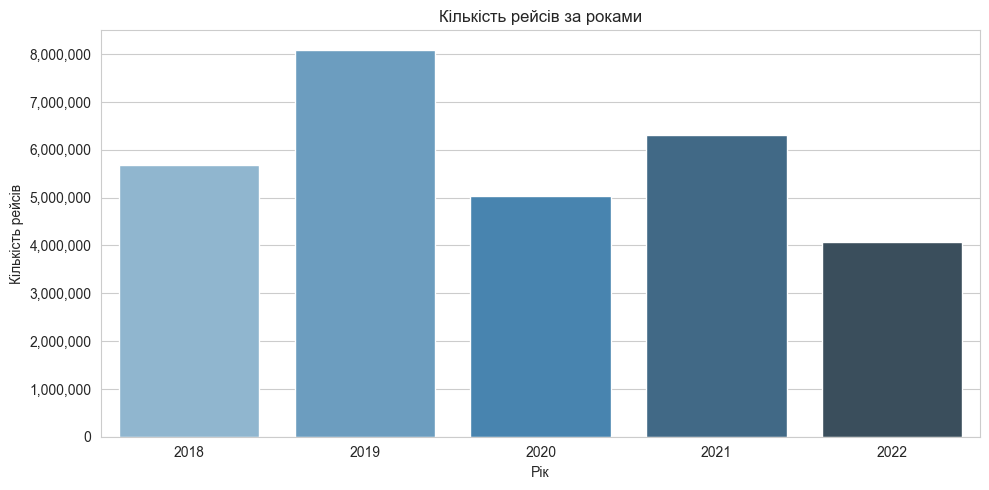

In [15]:
flights_with_date = fact_flight.merge(dim_date, on='date_id', how='left')
flights_with_date['flight_date'] = pd.to_datetime(flights_with_date['flight_date'], errors='coerce')

flights_with_date['year'] = flights_with_date['flight_date'].dt.year
flights_by_year = flights_with_date.groupby('year').size().reset_index(name='flights_count').sort_values('year')

print("Загальна кількість рейсів за роками:")
print(flights_by_year.to_string(index=False))

valid_dates = flights_with_date['flight_date'].dropna()
if not valid_dates.empty:
    min_date = valid_dates.min().date()
    max_date = valid_dates.max().date()
    print(f"\nПеріод виконання рейсів: з {min_date} по {max_date}")
else:
    print("\nНе знайдено жодної коректної дати рейсу.")

import matplotlib.ticker as mtick

plt.figure(figsize=(10,5))
sns.barplot(data=flights_by_year, x='year', y='flights_count', palette='Blues_d')
plt.title('Кількість рейсів за роками')
plt.xlabel('Рік')
plt.ylabel('Кількість рейсів')
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
print("Кількість пропущених значень у кожному стовпці:")

missing_counts = fact_flight.isna().sum()
missing_pct = (missing_counts / len(fact_flight) * 100).round(2)

missing_df = pd.DataFrame({
    "missing_count": missing_counts,
    "missing_pct": missing_pct
})

print(missing_df.sort_values('missing_count', ascending=False).to_string())

duplicate_count = fact_flight.duplicated().sum()
print(f"\nКількість дубльованих рядків: {duplicate_count}")

duplicate_count = fact_flight.duplicated().sum()
print(f"Точні дублікати рядків: {duplicate_count}")
if duplicate_count > 0:
    dup_groups = (fact_flight[fact_flight.duplicated(keep=False)]
                  .groupby(list(fact_flight.columns))
                  .size()
                  .reset_index(name='count')
                  .sort_values('count', ascending=False))
    print('\nНайчастіші дублікати (показано до 5):')
    print(dup_groups.head(5).to_string(index=False))
else:
    print('Точних дублікатів не знайдено.')


Кількість пропущених значень у кожному стовпці:
                         missing_count  missing_pct
departure_time_id              8873627        30.38
arrival_time_id                6249737        21.40
arr_delay_minutes               846884         2.90
actual_elapsed_time             846338         2.90
dep_delay_minutes               763745         2.62
flight_complexity_score         763745         2.62
tail_number                     268217         0.92
crs_elapsed_time                    22         0.00
flight_id                            0         0.00
date_id                              0         0.00
origin_airport_id                    0         0.00
destination_airport_id               0         0.00
marketing_airline_id                 0         0.00
operating_airline_id                 0         0.00
distance                             0         0.00
status                               0         0.00
                         missing_count  missing_pct
departure_time_i

Розподіл статусів рейсів:

status
on_time      25328601
delayed       3097830
cancelled      777932

Відсотковий розподіл:
status
on_time      86.73
delayed      10.61
cancelled     2.66

Кількість скасованих рейсів: 777932
Кількість затриманих рейсів: 3097830


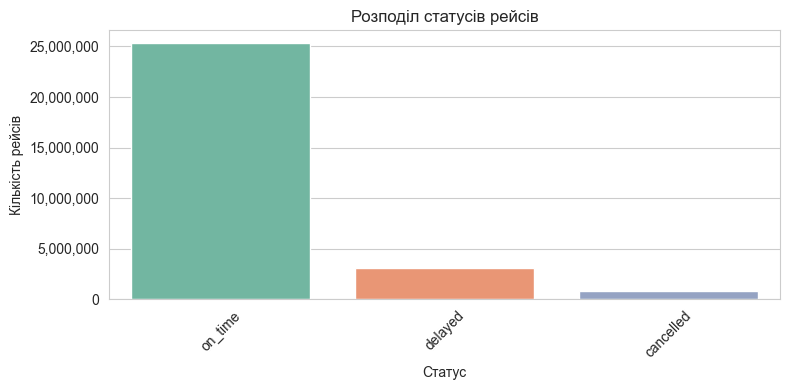

In [16]:
print("Розподіл статусів рейсів:\n")

status_counts = fact_flight['status'].value_counts(dropna=False)
status_pct = (status_counts / len(fact_flight) * 100).round(2)
print(status_counts.to_string())
print('\nВідсотковий розподіл:')
print(status_pct.to_string())

cancelled_count = int(status_counts.get('cancelled', 0))
diverted_count = int(status_counts.get('delayed', 0))

print(f"\nКількість скасованих рейсів: {cancelled_count}")
print(f"Кількість затриманих рейсів: {diverted_count}")

plt.figure(figsize=(8,4))
sns.barplot(x=status_counts.index.astype(str), y=status_counts.values, palette='Set2')
plt.title('Розподіл статусів рейсів')
plt.xlabel('Статус')
plt.ylabel('Кількість рейсів')
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
